In [50]:
import sys
import time
import os
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
import mglearn
from IPython.display import display

from sklearn.dummy import DummyClassifier, DummyRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    average_precision_score, 
    auc,
    roc_curve,
    precision_recall_curve
)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.svm import SVC, SVR

%matplotlib inline

In [33]:
df = pd.read_csv(
    "../data/raw/contraceptive.csv",
    header=0,
    names=[
        "Wife age",
        "Wife education",
        "Husband education",
        "Number of children ever born",
        "Wife religion",
        "Wife now working?",
        "Husband occupation",
        "Standard_of_living index",
        "Media exposure",
        "Contraceptive method used",
    ],
)

# Split the data into 70:30
df = df.rename(columns=lambda x: x.replace(" ", "_"))
df= df.rename(columns=lambda x: x.replace("'s", ""))
df
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.head()

train_df

,Wife_age,Wife_education,Husband_education,Number_of_children_ever_born,Wife_religion,Wife_now_working?,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
834,41,1,4,9,1,1,2,1,0,3
491,40,4,4,6,0,0,1,4,0,2
376,40,3,3,3,1,1,2,2,1,1
250,34,4,4,3,0,1,1,2,0,1
228,47,1,4,8,1,1,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...
1041,24,3,3,2,1,0,3,2,0,1
1122,30,3,4,4,0,1,2,3,0,1
1346,35,2,3,6,1,1,2,3,0,3
1406,36,1,1,5,1,1,3,3,0,3


In [34]:
X_test, y_test = test_df.drop(columns=["Contraceptive_method_used"]), test_df["Contraceptive_method_used"]

In [36]:
#Converting it to a binary model(test set)
y_test = y_test.replace(1,0)
y_test = y_test.replace([2,3],1)


In [37]:
import pickle

final_svc_model = pickle.load(open("/Users/valliakella/Documents/UBC/522Project/contraceptive_method_predictor/results/models/final_svc.pkl", "rb"))

In [38]:
final_svc_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Wife_age',
                                                   'Number_of_children_ever_born']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Wife_education',
                                                   'Husband_education',
                                                   'Husband_occupation',
                                                   'Standard

In [39]:
import pickle
final_params = pickle.load(open("/Users/valliakella/Documents/UBC/522Project/contraceptive_method_predictor/results/models/final_params.pkl", "rb"))
                           

In [40]:
final_params

{'svc__gamma': 0.01, 'svc__class_weight': None, 'svc__C': 10.0}

In [41]:
y_pred = final_svc_model.predict(X_test)

In [42]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [62]:
score = final_svc_model.score(X_test, y_test)
score

0.7420814479638009

In [63]:
confusion_matrix(y_test, y_pred)


array([[ 97,  87],
       [ 27, 231]])

In [81]:
cl_report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cl_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.782258,0.726415,0.742081,0.754337,0.749662
recall,0.527174,0.895349,0.742081,0.711261,0.742081
f1-score,0.629870,0.802083,0.742081,0.715977,0.730393
support,184.000000,258.000000,0.742081,442.000000,442.000000


In [87]:
def plot_roc_curve(
    label="SVC: ROC Curve",
    marker_colour="r",
    marker_label="SVC default threshold",
):
    fpr, tpr, thresholds = roc_curve(y_test, final_svc_model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=label)
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")

    default_threshold = np.argmin(np.abs(thresholds - 0.5))

    plt.plot(
        fpr[default_threshold],
        tpr[default_threshold],
        "or",
        markersize=10,
        label="threshold 0.5",
    )
    plt.legend(loc="best");


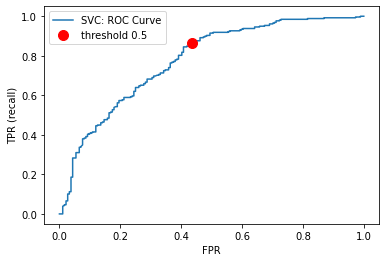

In [88]:
roc_plot = plot_roc_curve()
roc_plot

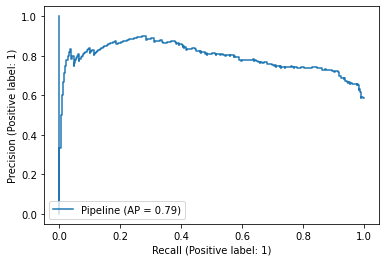

In [83]:
pr_curve = PrecisionRecallDisplay.from_estimator(final_svc_model, X_test, y_test);

In [89]:
plt.savefig("pr_curve.png")

NameError: name 'out_dir' is not defined

In [71]:
plt.savefig("roc_curve.png")

<Figure size 432x288 with 0 Axes>